In [155]:
#In this project we want to analyze patterns obtained by bouncing sonar signals to predict weather the signal comes from
# a rock or metal metal cylinder.
#Each pattern is a set of 60 numbers in the range 0.0 to 1.0.
#Each number represents the energy within a particular frequency band, integrated over a certain period of time.
#The details about the data can be found here (https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [157]:
df=pd.read_csv("sonar.all-data.csv")

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [159]:
# We can see there are no missing data

In [160]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [161]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [162]:
#We are trying to predict the label column
df["Label"].value_counts()

Label
M    111
R     97
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

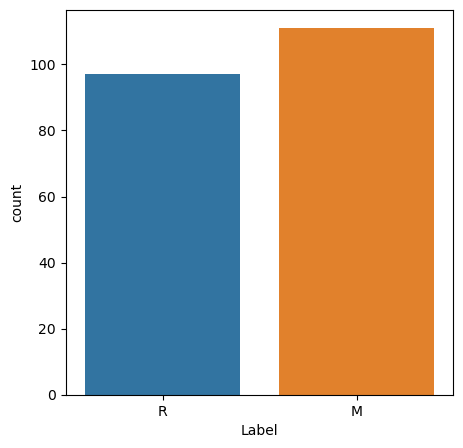

In [163]:
# M corresponds to mine and R corresponds to rock
plt.figure(figsize=(5,5),dpi=100)
sns.countplot(data=df,x="Label")
#We can see that we don't have big imbalanced 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'Freq_1'),
  Text(1, 0, 'Freq_2'),
  Text(2, 0, 'Freq_3'),
  Text(3, 0, 'Freq_4'),
  Text(4, 0, 'Freq_5'),
  Text(5, 0, 'Freq_6'),
  Text(6, 0, 'Freq_7'),
  Text(7, 0, 'Freq_8'),
  Text(8, 0, 'Freq_9'),
  Text(9, 0, 'Freq_10'),
  Text(10, 0, 'Freq_11'),
  Text(11, 0, 'Freq_12'),
  Text(12, 0, 'Freq_13'),
  Text(13, 0, 'Freq_14'),
  Text(14, 0, 'Freq_15'),
  Text(15, 0, 'Freq_16'),
  Text(16, 0, 'Freq_17'),
  Text(17, 0, 'Freq_18'),
  Text(18, 0, 'Freq_19'),
  Text(19, 0, 'Freq_20'),
  Text(20, 0, 'Freq_21'),
  Text(21, 0, 'Freq_22'),
  Text(22, 0, 'Freq_23'),
  Text(23, 0, 'Freq_24'),
  Text(24, 0, 'Freq_25'),
  Text(25, 0, 'Freq_26'),
  Text(26, 0, 'Freq_27'),
  Text(27, 0, 'Freq_28'),
  Text(28, 0, 'Fr

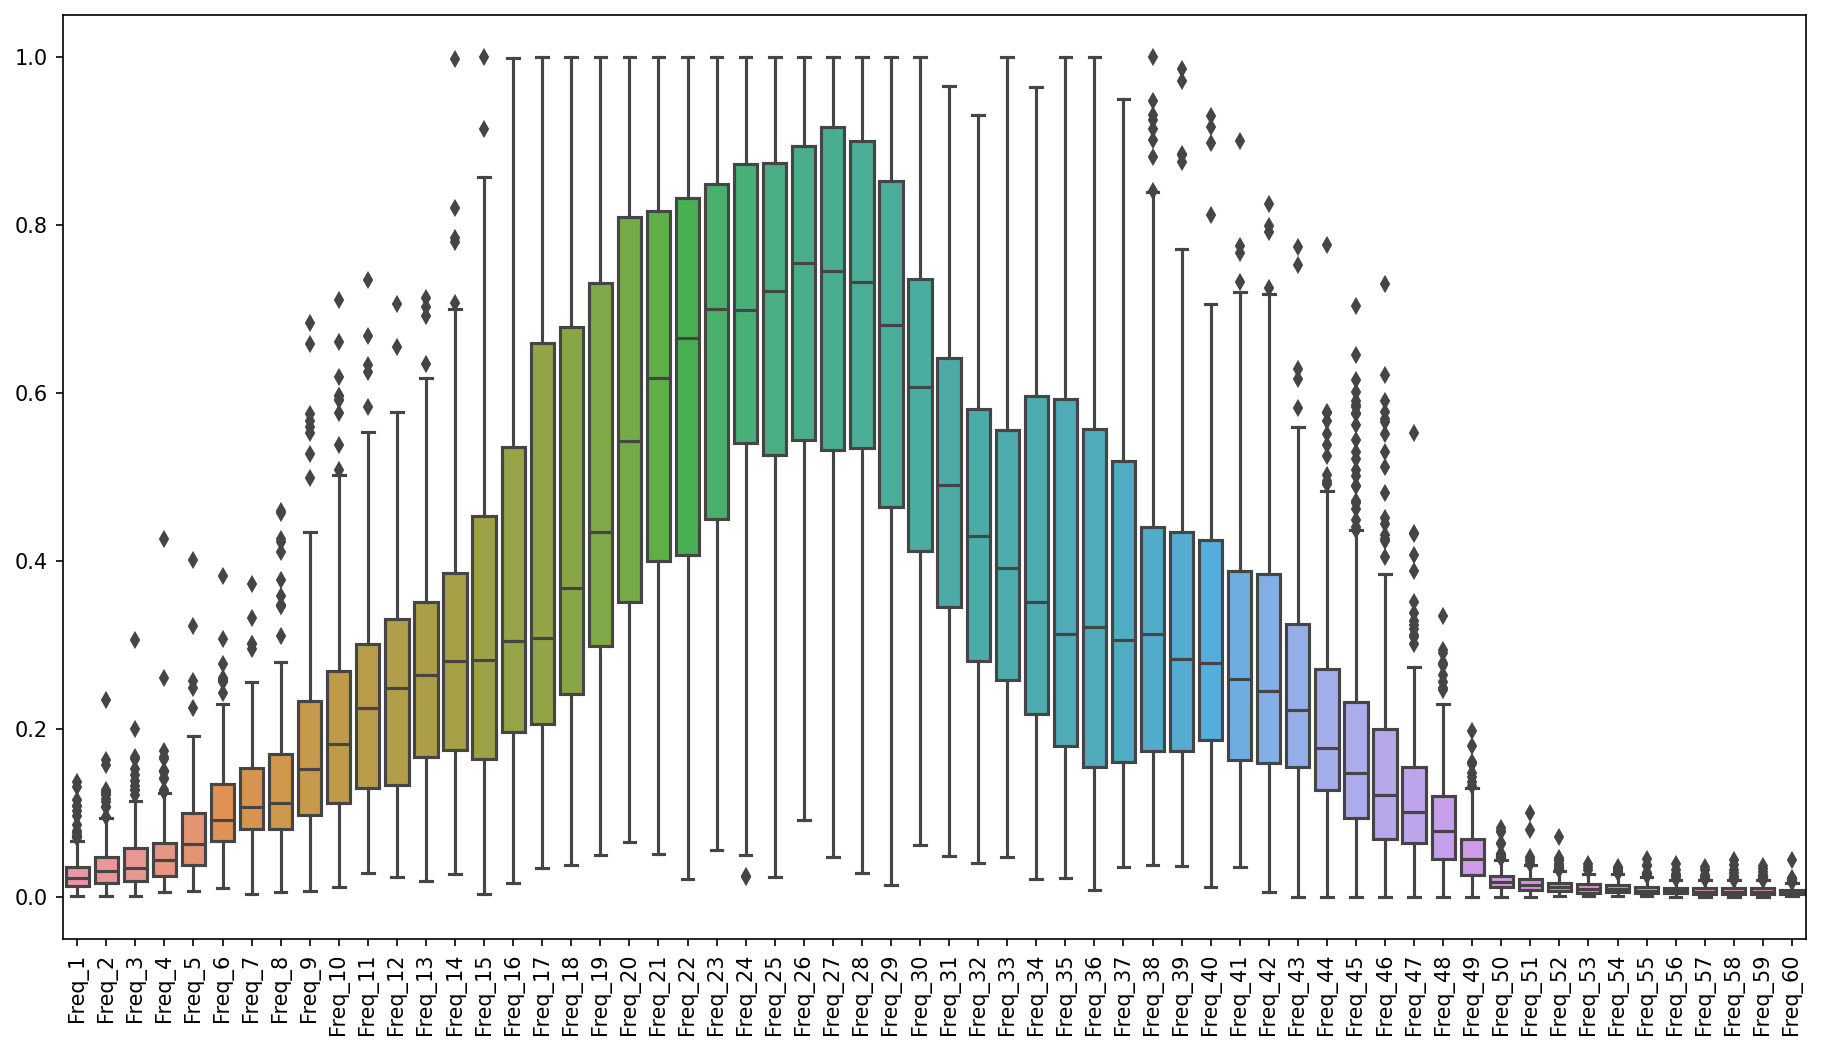

In [164]:
plt.figure(figsize=(15,8),dpi=150)
sns.boxplot(data=df.drop("Label",axis=1))
plt.xticks(rotation=90)

In [165]:
#We can see that features values range from 0 to 1 and have less spread and smaller average values at the left and right edges of above distribution

In [166]:
#Converting label from sring to number to calculate correlations between labels and features
df["Quality"]=df["Label"].map({"R":0,"M":1})

In [167]:
df_corr=pd.DataFrame(df.drop("Label",axis=1).corr()["Quality"].sort_values())

In [168]:
df_corr.transpose()

,Freq_36,Freq_35,Freq_37,Freq_34,Freq_31,Freq_33,Freq_32,Freq_38,Freq_40,Freq_17,...,Freq_46,Freq_13,Freq_9,Freq_48,Freq_45,Freq_10,Freq_49,Freq_12,Freq_11,Quality
Quality,-0.269151,-0.22767,-0.209055,-0.17201,-0.110728,-0.107184,-0.055275,-0.040527,-0.035928,-0.003969,...,0.30561,0.312811,0.321448,0.329333,0.339406,0.341142,0.351312,0.392245,0.432855,1.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, 'Freq_36'),
  Text(1, 0, 'Freq_35'),
  Text(2, 0, 'Freq_37'),
  Text(3, 0, 'Freq_34'),
  Text(4, 0, 'Freq_31'),
  Text(5, 0, 'Freq_33'),
  Text(6, 0, 'Freq_32'),
  Text(7, 0, 'Freq_38'),
  Text(8, 0, 'Freq_40'),
  Text(9, 0, 'Freq_17'),
  Text(10, 0, 'Freq_57'),
  Text(11, 0, 'Freq_30'),
  Text(12, 0, 'Freq_16'),
  Text(13, 0, 'Freq_18'),
  Text(14, 0, 'Freq_41'),
  Text(15, 0, 'Freq_25'),
  Text(16, 0, 'Freq_26'),
  Text(17, 0, 'Freq_29'),
  Text(18, 0, 'Freq_27'),
  Text(19, 0, 'Freq_39'),
  Text(20, 0, 'Freq_15'),
  Text(21, 0, 'Freq_24'),
  Text(22, 0, 'Freq_28'),
  Text(23, 0, 'Freq_60'),
  Text(24, 0, 'Freq_55'),
  Text(25, 0, 'Freq_7'),
  Text(26, 0, 'Freq_23'),
  Text(27, 0, 'Freq_56'),
  Tex

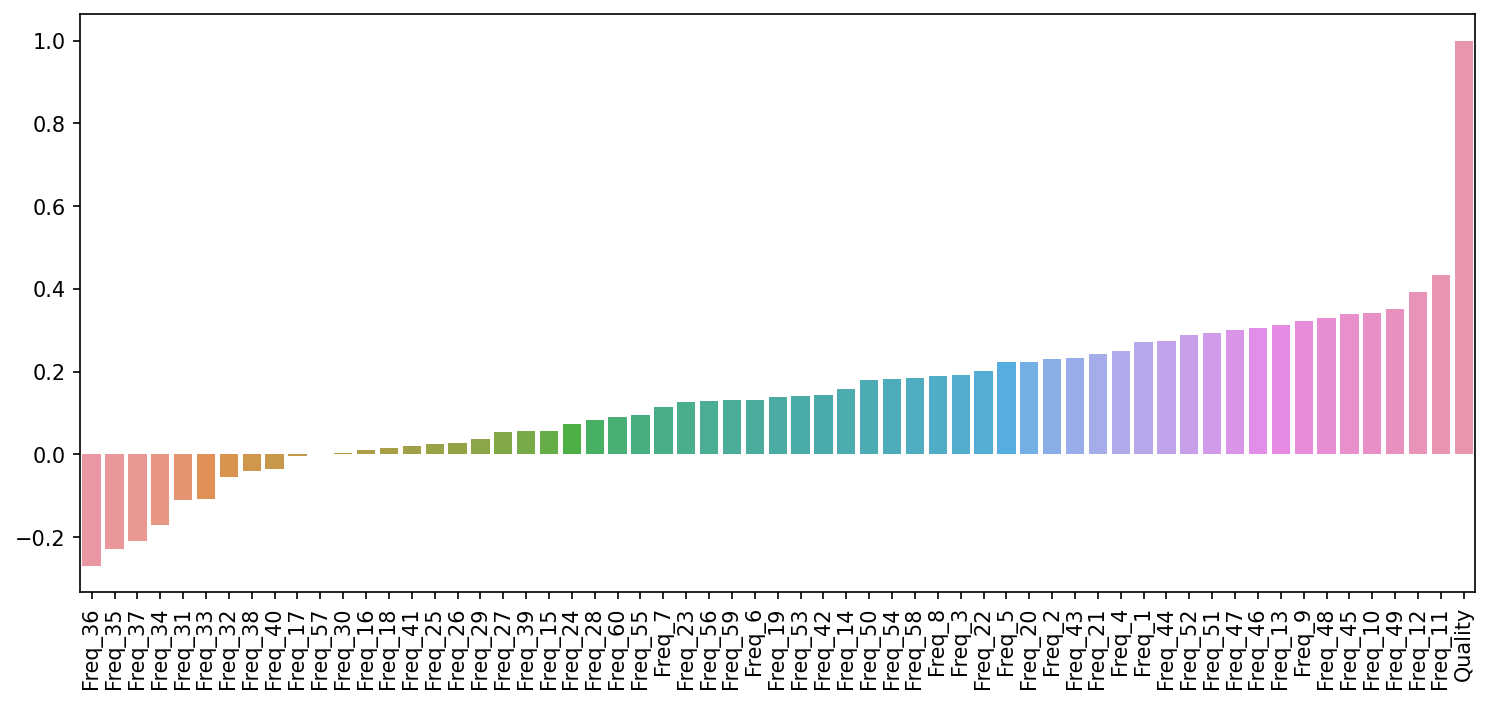

In [169]:
plt.figure(figsize=(12,5),dpi=150)
sns.barplot(data=df_corr.transpose())
plt.xticks(rotation=90)

In [170]:
#We can see the features with lowes and highes correlations with label, that is 1 for mine and 0 for rock

#  Model for classification 

In [171]:
#Drop the extra column we have created above
df=df.drop("Quality",axis=1)

In [172]:
df.columns

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label'],
      dtype='object')

In [173]:
# We first  need to separate features from labels
X=df.drop("Label",axis=1)
y=df["Label"]
# We need to separate data into training and testing samples


In [174]:
#We have overall 208 records, and it is reasonable to keep  30 for testing and use 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [175]:
#We will be using KNN classifier 
#It is important for all the features to be in the same scal for KNN since it uses distance meric,
#bu we don't need o perform any scaling since the features ar already in the same scale from 0 to 1

In [176]:
# we will use Grid searchcross validation o choose the model parameters that give best performance

In [177]:
model=KNeighborsClassifier()
#param_grid={"n_neighbors":[1,5,11,int(len(df)**0.5),20]}
kval=list(range(1,int(1.5*len(df)**0.5)))
param_grid={"n_neighbors":kval}
grid=GridSearchCV(model,param_grid,cv=3,scoring="accuracy")

In [178]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [179]:
grid.best_params_

{'n_neighbors': 1}

In [180]:
y_pred=grid.predict(X_test)

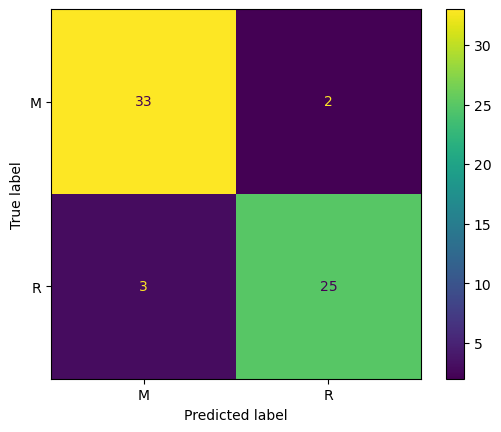

In [181]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [182]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.94      0.93        35
           R       0.93      0.89      0.91        28

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [183]:
#We can see that the KNN model performs well giving best estimation with k=1 with precision,recall and accuracy close to one